## Image Rotation

Importing libraries

In [2]:
# System libraries
import os
import sys
sys.path.append(os.path.join(".."))

# OpenCV and NumPy for image processing
import cv2
import numpy as np

# Display utilities
from utils.imutils import jimshow
from matplotlib import pyplot as plt

# Pathlib
from pathlib import Path

__Load Image__

In [58]:
image = cv2.imread(os.path.join("..", "data", "img", "trex.png"))

In [4]:
image.shape

(228, 350, 3)

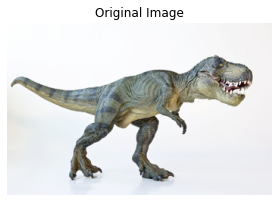

In [5]:
jimshow(image, "Original Image")

__Defining the center of the image__

When doing rotation we need to tell openCV where the center of the image is, in order to rotate the image around the center. Hence, we need to define the center of the image.

In [12]:
# We are only interested in the height and width of the image when defining the center of the image
height = image.shape[0]
width = image.shape[1]

In [33]:
# We want the center to be a tuple
center = (width//2, height//2) # we use // in order to get an integer instead of a float. We could also have used int() 

In [34]:
print(center)

(175, 114)


__Create rotation matrix__

We want create a rotation matrix using OpenCV

In [35]:
# We use a function from OpenCV to create the rotation matrix
M = cv2.getRotationMatrix2D(center = center, angle = 45, scale = 1)
# Theta/angle = the degree angle we want to rotate through. What we set this to defines how much we rotate the image.
# Scale = the scaling factor. This determines how much we zoom in or out (scale)

In [38]:
print(M)
# M is just a rotation matrix. 

[[  0.70710678   0.70710678 -29.35385976]
 [ -0.70710678   0.70710678 157.13351365]]


In [36]:
# We use the cv2.warpAffine() to rotate the image
rotated = cv2.warpAffine(image, M, (width, height))

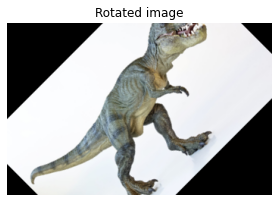

In [37]:
jimshow(rotated, "Rotated image")

__Create a function that rotates an image__

Our solution: 

In [61]:
def img_rotate(image = image, theta = 0, scale = 0):
    # Define center point of image
    height, width = image.shape[:2]
    center = (width//2, height//2)
    # Define rotation matrix
    M = cv2.getRotationMatrix2D(center, theta, scale)
    # Rotated image
    rotated_image = cv2.warpAffine(image, M, (width, height))
    return rotated_image

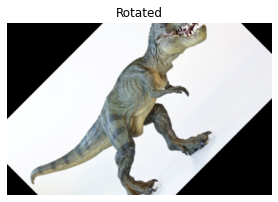

In [62]:
jimshow(img_rotate(image, 45, 1.0), "Rotated")

Ross' solution:

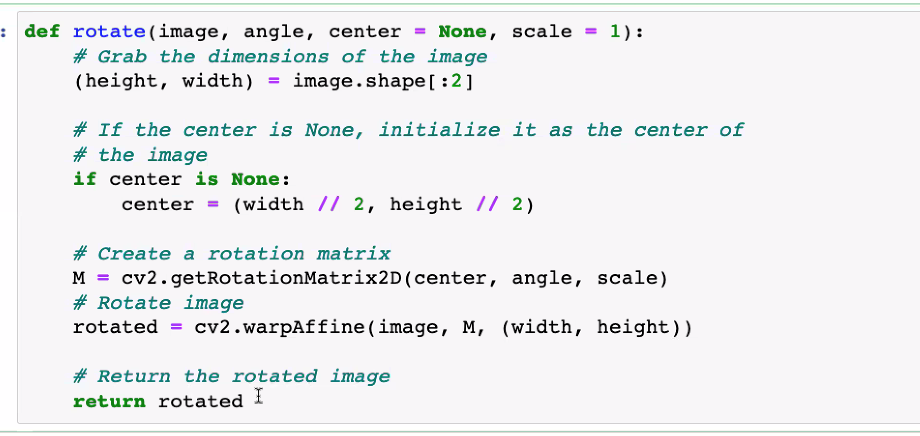

## Splitting Channels

We can use OpenCV to split an image into channels (blue, green, red arrays)

In [64]:
# We create a tuple in which we have each channel/array
(blue, green, red) = cv2.split(image)

In [66]:
# Now we can print the arrays individually
print(blue)
print(red)
print(green)

[[254 254 254 ... 238 237 226]
 [254 254 254 ... 238 237 231]
 [254 254 254 ... 238 237 234]
 ...
 [246 246 246 ... 242 242 242]
 [246 246 246 ... 243 243 243]
 [247 247 247 ... 243 243 243]]
[[254 254 254 ... 243 242 234]
 [254 254 254 ... 243 242 238]
 [254 254 254 ... 243 242 240]
 ...
 [238 238 238 ... 236 236 236]
 [238 238 238 ... 237 237 237]
 [239 239 239 ... 237 237 237]]
[[254 254 254 ... 239 238 227]
 [254 254 254 ... 239 238 232]
 [254 254 254 ... 239 238 235]
 ...
 [241 241 241 ... 237 237 237]
 [241 241 241 ... 238 238 238]
 [242 242 242 ... 238 238 238]]


In [3]:
# In order to view the channels individually we need to define a function that allows us to do it 
# This function can be found in imutils
import matplotlib as mpl
from utils.imutils import jimshow_channel

In [4]:
# Now we can view the channels individually
jimshow_channel(red, "Red")
jimshow_channel(blue, "Blue")
jimshow_channel(green, "Green")
# Here we can see the intensity of each color
# The lighter the grayscale the more intensive the color is. 

NameError: name 'red' is not defined

__Define empty NumPy Array__

We want an empty array in order to be able to display the color channels individually.

In [85]:
# Creating an array comprising only 0s - an image with nothing in it
# We still want the same shape as the original image but only consisting of 0s
empty_array = np.zeros(image.shape[:2], dtype = "uint8")
# uint means unsigned intergers, which means that we are not allowing negative integers
# We use dtype = "uint8" to overwrite the default which is float - we do not want floats, but we want integers. And since we do not want negative values we use unassigned integers which ignores negative values

__Displaying red__

In [88]:
# We use the merge() function to merge the red array with the empty array
red_image = cv2.merge([empty_array, empty_array,red])

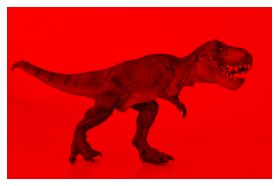

In [89]:
jimshow(red_image)
# We are only displaying the red in the image. This is what happens when we only display the red.

__Displaying green__

In [94]:
green_image = cv2.merge([empty_array, green, empty_array])

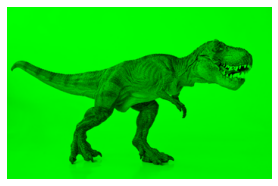

In [95]:
jimshow(green_image)

__Displaying blue__

In [96]:
blue_image = cv2.merge([blue, empty_array, empty_array])

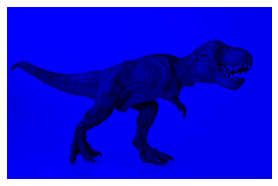

In [97]:
jimshow(blue_image)

When we separate an image into color channels, we see that certain part of the image become more pronounced depending on which channels is displayed. 

__Why is this interesting?__

Because we often find that separating an image into separate channels, we are able to detect images much easier. This is nice for face recognition, hand writing recognition etc. Hence, this has practical implications. 

## Histograms

Making grayscale histograms. By separating the channels, we can make the distirbution of different values from within those channels. This allows us to make the grayscale histogram. We create this using the __matplotlib__ library, which is the default for most plotting in Python. 

__Using matplotlib__

Creating a figure (any kind of visualization)

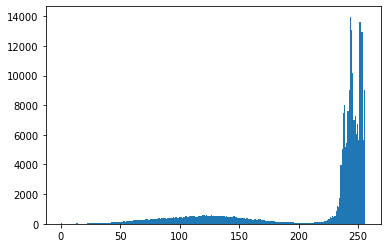

In [105]:
# Creating a figure with default parameters
plt.figure()

We can use the hist() to add a histogram to the figure


The hist() function takes three paramters: 
1. array
2. number of bins
3. a range of possible values

plt.hist(array, number_of_bins [range_of_possible_values])

We can use the flatten() function to flatten the image and reduce the number of dimensions. When we flatten an image, we take each array (each channel) and flatten them into a single dimension, i.e. a list. Then we merge the channels into one long one-dimensional array. Now we have an array of many values that each can go from 0-255. This value represent the intensity of the color. Hence, we have a grayscale image. 
Hence, when we flatten an image we create a one-dimensional array of color intensities.

Creating the array (the greyscale image) by flattening the image:

In [102]:
grey_image = image.flatten()

Adding the array (grayscale) to the histogram:

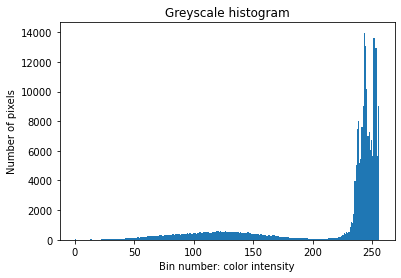

In [107]:
plt.hist(grey_image, 256, [0,256])
plt.title("Greyscale histogram") # adding plot title
plt.xlabel("Bin number: color intensity") # adding x-axis title
plt.ylabel("Number of pixels") # adding y-axis title
plt.show()

What we see is the distirbution of pixels in terms of color intensity. Hence, we have a grayscale histogram of the image. We can see that most pixels are in the high intensity range, which means that the image contains a lot of white color.

## Studying Multiple Images

Take what we have done so far and creating a function

In [118]:
def plot_greyscale(input_image, image_name):
    # Initialize figure
    plt.figure()
    # Plot greyscale histogram
    plt.hist(input_image.flatten(), 256, [0,256])
    # Give plot title
    plt.title(f"{image_name}")
    # Create xlabel
    plt.xlabel("Bin number: color intensity")
    # Create ylabel
    plt.ylabel("Number of pixels")
    # Show plot
    plt.show()

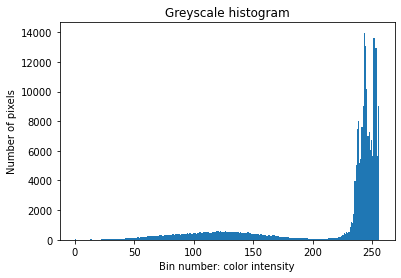

In [109]:
# Making sure the function works
plot_greyscale(image)

## Task
1. Iterate over the files in data/img
2. If it’s a png file
3. Do plot_greyscale



Our solution:

In [116]:
# Defining path to images
data_path = os.path.join("..", "data", "img")

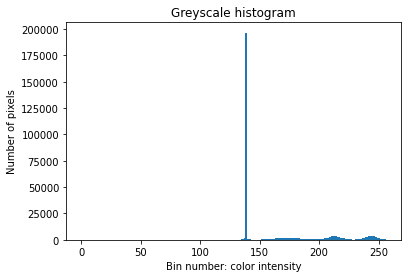

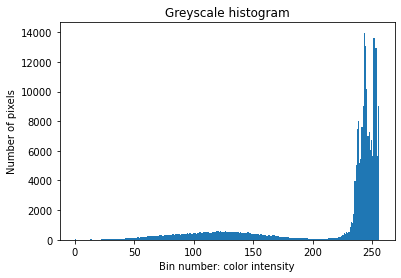

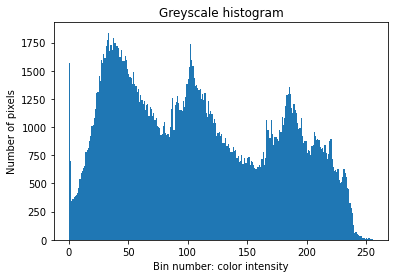

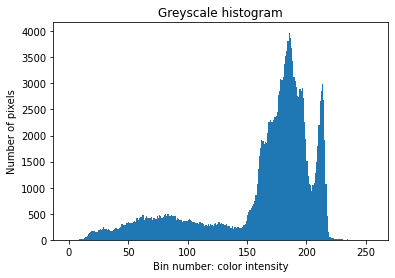

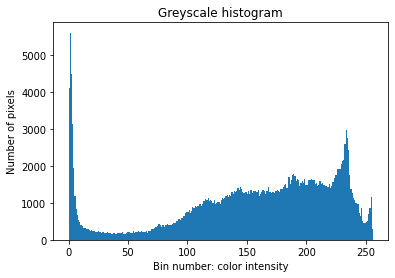

In [115]:
# Creating loop
for img in Path(data_path).glob("*.png"):
    image = cv2.imread(str(img))
    plot_greyscale(image)

Ross' solution:

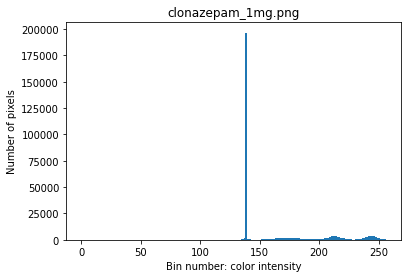

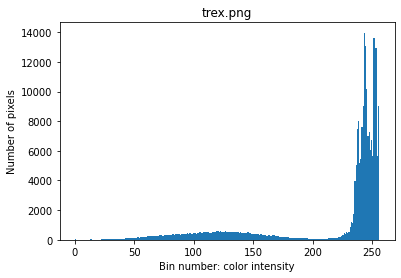

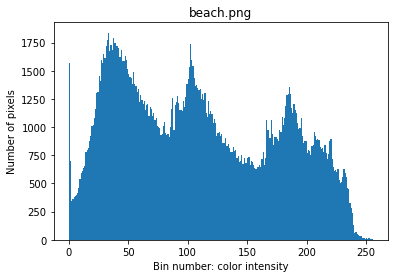

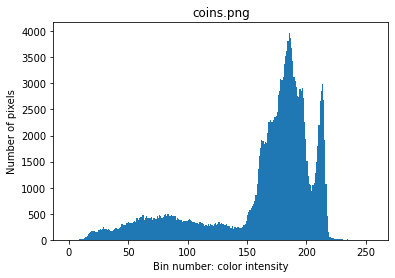

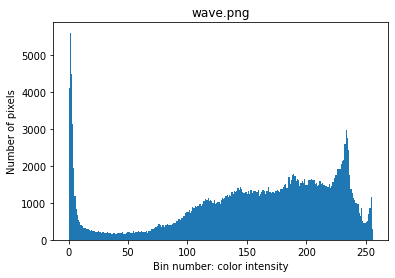

In [121]:
# Import pathlib
from pathlib import Path

# Point to an image directory
image_dir = os.path.join("..", "data", "img")

# Iterate over each file
for image in Path(image_dir).glob("*.png"):
    # We need to specify that the directory path is a string
    image_path = str(image)
    # read image
    image = cv2.imread(image_path) 
    # Get image_name from image_path
    image_name = os.path.split(image_path)[1] # # taking the second part of the path which is the image name and not the path to it
    #plot greyscale
    plot_greyscale(image, image_name)

In [125]:
# If you want to look for either png or jpg
# This can be implemented into the loop above if this is something you want to add
for image in os.listdir(image_dir):
    if image.endswith(".png"):
        print(image)
    elif image.endswith(".jpg"):
        print("this is a jpg")
    else:
        print("not a png or a jpg")

clonazepam_1mg.png
trex.png
beach.png
coins.png
this is a jpg
wave.png


## Experiment with splitting up images